## Développement du modèle simple (TF-IDF)

- Résumé des étapes :
- Cellule 1 : Import des librairies.
- Cellule 2 : Chargement du DataFrame nettoyé.
- Cellule 3 : Transformation du texte en vecteurs TF-IDF.
- Cellule 4 : Division des données en ensemble d'entraînement et de test.
- Cellule 5 : Entraînement du modèle de régression logistique.
- Cellule 6 : Évaluation des performances du modèle.
- Cellule 7 : Enregistrement du modèle et des résultats avec MLFlow.

### Cellule 1 : Importer les librairies nécessaires

In [10]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # Pour la transformation en vecteurs TF-IDF
from sklearn.linear_model import LogisticRegression # Pour le modèle de régression logistique
from sklearn.model_selection import train_test_split # Pour la division des données
from sklearn.metrics import classification_report # Pour l'évaluation des performances
import mlflow
import mlflow.sklearn # Pour l'enregistrement du modèle avec MLFlow


### Cellule 2 : Chargement des données nettoyées et renommage des colonnes

In [11]:
import os
import pandas as pd

# Chemin relatif pour charger les données nettoyées
file_path = os.path.join("..", "data", "cleaned_data_with_text_for_models.csv")

# Charger les données nettoyées
data = pd.read_csv(file_path, index_col=0)


# Vérification du contenu du DataFrame
data.head(10)

,clean_text_tfidf,clean_text_embeddings,clean_text_bert,target
text,,,,
"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",awww thats bummer shoulda get david carr third...,awww thats a bummer you shoulda get david carr...,"['@', 'switch', '##foot', '-', 'aw', '##w', '#...",0
is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset cant update facebook texting might cry r...,be upset that he cant update his facebook by t...,"['is', 'upset', 'that', 'he', 'can', ""'"", 't',...",0
@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,dive many time ball manage save 50 rest go bound,i dive many time for the ball manage to save 5...,"['@', 'ken', '##ich', '##an', 'i', 'dive', '##...",0
my whole body feels itchy and like its on fire,whole body feel itchy like fire,my whole body feel itchy and like its on fire,"['my', 'whole', 'body', 'feels', 'it', '##chy'...",0
"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",behave im mad cant see,no its not behave at all im mad why be i here ...,"['@', 'nationwide', '##class', 'no', ',', 'it'...",0
@Kwesidei not the whole crew,whole crew,not the whole crew,"['@', 'kw', '##es', '##ide', '##i', 'not', 'th...",0
Need a hug,need hug,need a hug,"['need', 'a', 'hug']",0
"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",hey long time see yes rain bite bite lol im fi...,hey long time no see yes rain a bite only a bi...,"['@', 'lo', '##lt', '##rish', 'hey', 'long', '...",0
@Tatiana_K nope they didn't have it,nope didnt,nope they didnt have it,"['@', 'tatiana', '_', 'k', 'nope', 'they', 'di...",0


In [12]:
# Valeurs manquantes
data.isnull().sum()

clean_text_tfidf         7143
clean_text_embeddings    3392
clean_text_bert             0
target                      0
dtype: int64

### Cellule 3 : Transformation des tweets en vecteurs TF-IDF

In [13]:
# Remplacer les valeurs NaN par des chaînes vides
data['clean_text_tfidf'] = data['clean_text_tfidf'].fillna('')

# Transformation des tweets en vecteurs TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limiter à 10 000 mots les plus fréquents
X = tfidf_vectorizer.fit_transform(data['clean_text_tfidf'])  # Utiliser la colonne nettoyée pour TF-IDF
y = data['target']  # La colonne contenant les labels (sentiments)

### Cellule 4 : Division des données en ensemble d'entraînement et de test

In [14]:
# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Cellule 5 : Entraînement du modèle de régression logistique

In [15]:
# Entraînement du modèle de régression logistique
model = LogisticRegression(max_iter=1000)  # On peut ajuster max_iter si nécessaire
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Cellule 6 : Évaluation des performances du modèle

In [16]:
# Évaluation des performances du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.77      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



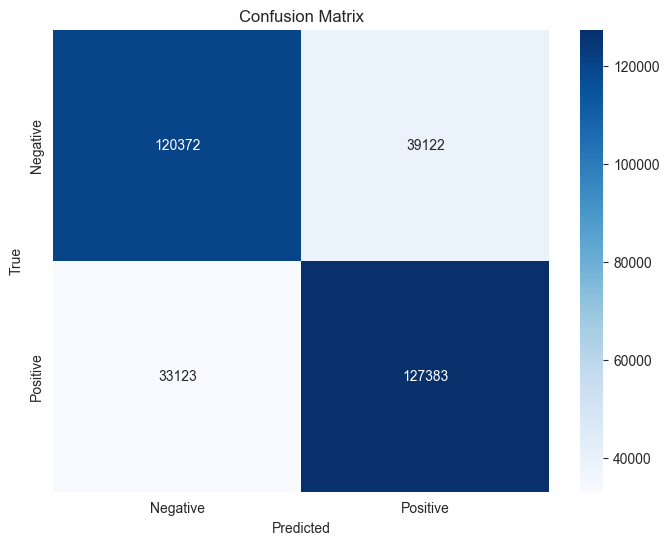

In [17]:
### Matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

### Dans le cadre de cette analyse, le modèle de classification a été entraîné sur des tweets, avec pour objectif de déterminer si ces derniers expriment un **sentiment positif** ou **négatif**, en utilisant la technique de transformation des textes via **TF-IDF (Term Frequency-Inverse Document Frequency)**.

### Analyse de la Matrice de Confusion pour les Tweets Positifs et Négatifs

La matrice de confusion présente les résultats de la classification effectuée par le modèle sur les tweets. Voici l'interprétation des différentes catégories de cette matrice :

1. **Vrais Négatifs (120344)** : Le modèle a correctement identifié 120344 tweets comme **négatifs**. Cela signifie qu’il a bien capté les indices négatifs dans ces tweets, confirmant que le modèle est efficace pour reconnaître les sentiments négatifs dans un grand nombre de cas.

2. **Faux Négatifs (33060)** : Ces tweets, bien que positifs, ont été incorrectement classés comme négatifs par le modèle. Cette catégorie montre qu'il existe encore des erreurs où des tweets exprimant un sentiment positif sont mal identifiés, ce qui peut indiquer une mauvaise prise en compte de certaines expressions positives subtiles ou ambiguës.

3. **Faux Positifs (39150)** : Dans ce cas, le modèle a classé à tort 39150 tweets **négatifs** comme étant positifs. Cela suggère une certaine difficulté à différencier correctement certains tweets négatifs, notamment ceux qui peuvent contenir des termes pouvant être interprétés de manière ambiguë.

4. **Vrais Positifs (127446)** : Le modèle a bien reconnu 127446 tweets comme **positifs**, ce qui est un bon indicateur de sa capacité à identifier les sentiments positifs. Il capture efficacement les termes et expressions typiquement associés à des sentiments positifs.

### Observations sur le Modèle Basé sur TF-IDF
- **Bonne Identification des Tweets Positifs** : Le modèle montre une performance solide dans la détection des tweets positifs, avec un grand nombre de vrais positifs. Cela indique que les termes liés aux sentiments positifs sont bien pris en compte par l'approche TF-IDF.
- **Erreurs pour les Tweets Négatifs** : Le nombre relativement élevé de faux positifs montre que certains tweets négatifs sont mal classés. Cela peut être dû à la nature ambiguë de certaines expressions ou à une mauvaise représentation des termes négatifs par le modèle.
- **Faux Négatifs** : Le modèle a également des difficultés à reconnaître certains tweets positifs, ce qui peut être dû à des expressions subtiles qui ne sont pas bien capturées par l’approche TF-IDF.

### Conclusions et Pistes d'Amélioration
1. **Réduction des Faux Négatifs et Positifs** : Pour améliorer la performance du modèle, il est possible d’optimiser le prétraitement des données ou d’ajuster les hyperparamètres de l’approche TF-IDF. Cela pourrait réduire le nombre de faux négatifs et faux positifs, et donc améliorer la précision globale.

2. **Limites du TF-IDF** : Cette technique ne prend pas en compte le contexte sémantique des mots, ce qui explique certaines erreurs de classification. En effet, les sentiments peuvent être mal interprétés si le modèle se base uniquement sur la fréquence des termes, sans intégrer leur signification dans le contexte global.

3. **Approches plus Avancées en NLP** : L'utilisation de modèles plus sophistiqués, tels que **BERT** ou **word embeddings** comme GloVe ou FastText, pourrait améliorer la capacité du modèle à comprendre les nuances linguistiques des tweets, notamment dans des cas d’ironie ou de sarcasme.

En conclusion, l'approche TF-IDF a permis de bonnes performances globales dans la classification des sentiments, mais des améliorations sont encore possibles pour gérer plus efficacement les cas ambigus ou complexes.

### Cellule 7 : Enregistrement du modèle avec MLFlow
#### MLFlow (Utilisation en Local)

**MLFlow** est une plateforme qui facilite la gestion du cycle de vie des modèles de machine learning. En local, cela permet de suivre les différentes expérimentations, d’enregistrer les modèles et d’accéder aux artefacts directement sur votre machine. 

### Expérimentation

Une **expérimentation** correspond à une série de tests où un modèle est entraîné avec des hyperparamètres et des données spécifiques. Chaque expérimentation peut avoir des résultats différents (métriques de performance) en fonction des configurations utilisées. Avec MLFlow, chaque session d'expérimentation est enregistrée, ce qui permet de suivre l'évolution des tests et de comparer les modèles de manière organisée.

### Artefacts

Les **artefacts** sont tous les fichiers générés pendant les expérimentations :
- Les **modèles** (sauvegardés sous forme de fichiers pour être réutilisés).
- Les **métriques** de performance (par exemple, la précision ou le score F1).
- Les **hyperparamètres** utilisés lors de l'entraînement.
- Les **graphiques** ou logs produits durant l'entraînement.

En local, ces artefacts sont enregistrés sur votre disque dur, souvent dans un répertoire spécifique comme `./mlruns`. Cela vous permet d'accéder facilement à toutes les versions de vos modèles et à leurs performances directement depuis votre environnement de travail.

In [19]:
from pathlib import Path
import mlflow

# Chemin absolu pour le dossier "mlruns"
mlruns_path = Path("../mlruns").resolve()

# Configuration du chemin pour stocker les artefacts de MLFlow
mlflow.set_tracking_uri(mlruns_path.as_uri())

# Créer une nouvelle expérience ou utiliser une existante
experiment_name = "Logistic_Regression_TFIDF_Experiment"
mlflow.set_experiment(experiment_name)

# Démarrer une nouvelle session MLFlow
with mlflow.start_run():
    # Enregistrer le modèle de régression logistique
    mlflow.sklearn.log_model(model, "logistic_regression_tfidf")

    # Enregistrer les hyperparamètres
    mlflow.log_param("max_iter", 1000)

    # Enregistrer la précision (ou toute autre métrique)
    mlflow.log_metric("accuracy", model.score(X_test, y_test))

print(f"Modèle régression logistique avec TF-IDF enregistré dans {mlruns_path}.")


2024/10/20 11:28:23 INFO mlflow.tracking.fluent: Experiment with name 'Logistic_Regression_TFIDF_Experiment' does not exist. Creating a new experiment.
2024/10/20 11:28:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modèle régression logistique avec TF-IDF enregistré dans D:\OC_IA\P7\OC_IA_P7_analyse_sentiments_deep_Learning\mlruns.
